In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as pl
import anndata as ad
from matplotlib import rcParams
import scanpy as sc
import random
import FlowCal
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics.cluster import adjusted_rand_score

In [58]:
def clustering_similarity(sourse_file, n_experiment, n_neighbors_min, n_neighbors_max, resolution_min, resolution_max, n_pcs, is_random, n_random_seeds):
    # Read in data and preprocessing
    adata = FlowCal.io.FCSData(sourse_file)
    obs = None
    var = pd.DataFrame(index=np.array(adata.channels)
    if (sourse_file == 'Samusik_01.fcs'):
        color = np.array(adata.channels[8: -7])
    elif (sourse_file == 'Levine_13dim.fcs'):
        color = np.array(adata.channels[0: -1])
    elif (sourse_file == 'Levine_32dim.fcs'):
        color = np.array(adata.channels[4: -5])
    X = np.array(adata)
    X = list(X)
    for i in range(len(X) - 1, -1, -1):
        for j in range(0, len(X[0])):
            if np.isnan(X[i][j]):
                X.pop(i)
                break
    X = np.array(X)
    
    n_neighbors_array_total = []
    resolution_array_total = []
    similarity_array_total =[]
    progress = 0
    
    for count in range(0, n_experiment):
        # Randomly pick data or use complete data
        if (is_random):
            random_seeds = np.sort(np.array(random.sample(list(np.arange(0, X.shape[0] - 1)), n_random_seeds))) # choose 3,000 rows of data from the original data randomly
            sorted_X = [] 
            for i in random_seeds:
                sorted_X.append(X[i, :])
            sorted_X = np.array(sorted_X)
        else:
            sorted_X = X
        if (sourse_file == 'Levine_32dim.fcs'):
            label = sorted_X[:, -2].astype(int)
        else:
            label = sorted_X[:, -1].astype(int)
        if (sourse_file == 'Samusik_01.fcs'):
            sorted_X = sorted_X[:, 8: -7]
        elif (sourse_file == 'Levine_13dim.fcs'):
            sorted_X = sorted_X[:, 0: -1]
        elif (sourse_file == 'Levine_32dim.fcs'):
            sorted_X = sorted_X[:, 4: -5]

        # Make AnnData object
        if (sourse_file == 'Samusik_01.fcs'):
            adata = ad.AnnData(sorted_X, obs=obs, var=var[8: -7], dtype='float64')
        elif (sourse_file == 'Levine_13dim.fcs'):
            adata = ad.AnnData(sorted_X, obs=obs, var=var[0: -1], dtype='float64')
        elif (sourse_file == 'Levine_32dim.fcs'):
            adata = ad.AnnData(sorted_X, obs=obs, var=var[4: -5], dtype='float64')

        # PAGA part
        n_neighbors_array = []
        resolution_array = []
        similarity_array =[]
        sc.tl.pca(adata, svd_solver='arpack')
        
        for i in range(n_neighbors_min, n_neighbors_max + 1):
            sc.pp.neighbors(adata, n_neighbors=i, n_pcs=n_pcs)
            for j in range(int(10 * resolution_min), int(10 * resolution_max) + 1):
                n_neighbors_array.append(i)
                resolution_array.append(float(j / 10))
                leiden_clustering = sc.tl.leiden(adata, resolution=float(j / 10), copy = True)
                leiden = np.ndarray.flatten(np.array(leiden_clustering.obs, dtype = "int"))
                result = adjusted_rand_score(label, leiden)
                similarity_array.append(result)
                progress = progress + 1
                print("Progress: " + str(round((progress * 100) / (n_experiment * ((n_neighbors_max + 1 - n_neighbors_min) * (int(10 * resolution_max) + 1 - int(10 * resolution_min)))), 2)) + "% complete")
        
        n_neighbors_array_total.append(n_neighbors_array)
        resolution_array_total.append(resolution_array)
        similarity_array_total.append(similarity_array)
    
    # Return the arrays
    n_neighbors_array_total = np.array(n_neighbors_array_total)
    resolution_array_total = np.array(resolution_array_total)
    similarity_array_total = np.array(similarity_array_total)
    return n_neighbors_array_total, resolution_array_total, similarity_array_total

#### For Samusik_01.fcs:

In [59]:
sourse_file = 'Samusik_01.fcs'
n_experiment = 20 # number of experiment
# Note: larger n_neighbors, less clusters
n_neighbors_min = 2 # Cannot be smaller than 2
n_neighbors_max = 50
# Note: lower resolution, less clusters
resolution_min = 0.1
resolution_max = 2.0
n_pcs = 20
is_random = False # If True, use random data. If False, use complete data
n_random_seeds = 3000 # number of random data if random = True
n_neighbors_array_total_01, resolution_array_total_01, similarity_array_total_01 = clustering_similarity(sourse_file, n_experiment, n_neighbors_min, n_neighbors_max, resolution_min, resolution_max, n_pcs, is_random, n_random_seeds)

Progress: 0.1% complete
Progress: 0.2% complete
Progress: 0.31% complete
Progress: 0.41% complete
Progress: 0.51% complete
Progress: 0.61% complete
Progress: 0.71% complete
Progress: 0.82% complete
Progress: 0.92% complete
Progress: 1.02% complete
Progress: 1.12% complete
Progress: 1.22% complete
Progress: 1.33% complete
Progress: 1.43% complete
Progress: 1.53% complete
Progress: 1.63% complete
Progress: 1.73% complete
Progress: 1.84% complete
Progress: 1.94% complete
Progress: 2.04% complete
Progress: 2.14% complete
Progress: 2.24% complete
Progress: 2.35% complete
Progress: 2.45% complete
Progress: 2.55% complete
Progress: 2.65% complete
Progress: 2.76% complete
Progress: 2.86% complete
Progress: 2.96% complete
Progress: 3.06% complete
Progress: 3.16% complete
Progress: 3.27% complete
Progress: 3.37% complete
Progress: 3.47% complete
Progress: 3.57% complete
Progress: 3.67% complete
Progress: 3.78% complete
Progress: 3.88% complete
Progress: 3.98% complete
Progress: 4.08% complete
Pr

#### For Levine_13dim.fcs:

In [60]:
sourse_file = 'Levine_13dim.fcs'
n_experiment = 20 # number of experiment
# Note: larger n_neighbors, less clusters
n_neighbors_min = 2 # Cannot be smaller than 2
n_neighbors_max = 50
# Note: lower resolution, less clusters
resolution_min = 0.1
resolution_max = 2.0
n_pcs = 20
is_random = False # If True, use random data. If False, use complete data
n_random_seeds = 3000 # number of random data if random = True
n_neighbors_array_total_13, resolution_array_total_13, similarity_array_total_13 = clustering_similarity(sourse_file, n_experiment, n_neighbors_min, n_neighbors_max, resolution_min, resolution_max, n_pcs, is_random, n_random_seeds)

Progress: 0.1% complete
Progress: 0.2% complete
Progress: 0.31% complete
Progress: 0.41% complete
Progress: 0.51% complete
Progress: 0.61% complete
Progress: 0.71% complete
Progress: 0.82% complete
Progress: 0.92% complete
Progress: 1.02% complete
Progress: 1.12% complete
Progress: 1.22% complete
Progress: 1.33% complete
Progress: 1.43% complete
Progress: 1.53% complete
Progress: 1.63% complete
Progress: 1.73% complete
Progress: 1.84% complete
Progress: 1.94% complete
Progress: 2.04% complete
Progress: 2.14% complete
Progress: 2.24% complete
Progress: 2.35% complete
Progress: 2.45% complete
Progress: 2.55% complete
Progress: 2.65% complete
Progress: 2.76% complete
Progress: 2.86% complete
Progress: 2.96% complete
Progress: 3.06% complete
Progress: 3.16% complete
Progress: 3.27% complete
Progress: 3.37% complete
Progress: 3.47% complete
Progress: 3.57% complete
Progress: 3.67% complete
Progress: 3.78% complete
Progress: 3.88% complete
Progress: 3.98% complete
Progress: 4.08% complete
Pr

#### For Levine_32dim.fcs:

In [ ]:
sourse_file = 'Levine_32dim.fcs'
n_experiment = 20 # number of experiment
# Note: larger n_neighbors, less clusters
n_neighbors_min = 2 # Cannot be smaller than 2
n_neighbors_max = 50
# Note: lower resolution, less clusters
resolution_min = 0.1
resolution_max = 2.0
n_pcs = 20
is_random = False # If True, use random data. If False, use complete data
n_random_seeds = 3000 # number of random data if random = True
n_neighbors_array_total_32, resolution_array_total_32, similarity_array_total_32 = clustering_similarity(sourse_file, n_experiment, n_neighbors_min, n_neighbors_max, resolution_min, resolution_max, n_pcs, is_random, n_random_seeds)

Progress: 0.1% complete
Progress: 0.2% complete
Progress: 0.31% complete
Progress: 0.41% complete
Progress: 0.51% complete
Progress: 0.61% complete
Progress: 0.71% complete
Progress: 0.82% complete
Progress: 0.92% complete
Progress: 1.02% complete
Progress: 1.12% complete
Progress: 1.22% complete
Progress: 1.33% complete
Progress: 1.43% complete
Progress: 1.53% complete
Progress: 1.63% complete
Progress: 1.73% complete
Progress: 1.84% complete
Progress: 1.94% complete
Progress: 2.04% complete
Progress: 2.14% complete
Progress: 2.24% complete
Progress: 2.35% complete
Progress: 2.45% complete
Progress: 2.55% complete
Progress: 2.65% complete
Progress: 2.76% complete
Progress: 2.86% complete
Progress: 2.96% complete
Progress: 3.06% complete
Progress: 3.16% complete
Progress: 3.27% complete
Progress: 3.37% complete
Progress: 3.47% complete
Progress: 3.57% complete
Progress: 3.67% complete
Progress: 3.78% complete
Progress: 3.88% complete
Progress: 3.98% complete
Progress: 4.08% complete
Pr

#### Print highest similarity and its corresponding parameters

In [48]:
for i in range(0, n_experiment):
    print("For experiment " + str(i + 1) + ": ")
    print("Max similarity: " + str(round(100 * np.max(similarity_array_total_32[i]), 2)) + "%")
    max_index = np.argmax(similarity_array_total_32[i])
    print("The corresponding n_neighbor is: " + str(n_neighbors_array_total_32[i][max_index]))
    print("The corresponding resolution is: " + str(resolution_array_total_32[i][max_index]))

For experiment 1: 
Max similarity: 97.27%
The corresponding n_neighbor is: 19
The corresponding resolution is: 0.7
For experiment 2: 
Max similarity: 97.64%
The corresponding n_neighbor is: 40
The corresponding resolution is: 1.0
For experiment 3: 
Max similarity: 97.46%
The corresponding n_neighbor is: 35
The corresponding resolution is: 0.9
For experiment 4: 
Max similarity: 97.98%
The corresponding n_neighbor is: 28
The corresponding resolution is: 0.7
For experiment 5: 
Max similarity: 97.24%
The corresponding n_neighbor is: 44
The corresponding resolution is: 0.8
For experiment 6: 
Max similarity: 97.88%
The corresponding n_neighbor is: 45
The corresponding resolution is: 0.8
For experiment 7: 
Max similarity: 96.76%
The corresponding n_neighbor is: 26
The corresponding resolution is: 0.7
For experiment 8: 
Max similarity: 97.2%
The corresponding n_neighbor is: 31
The corresponding resolution is: 0.7
For experiment 9: 
Max similarity: 96.7%
The corresponding n_neighbor is: 34
The 

#### Surface plots

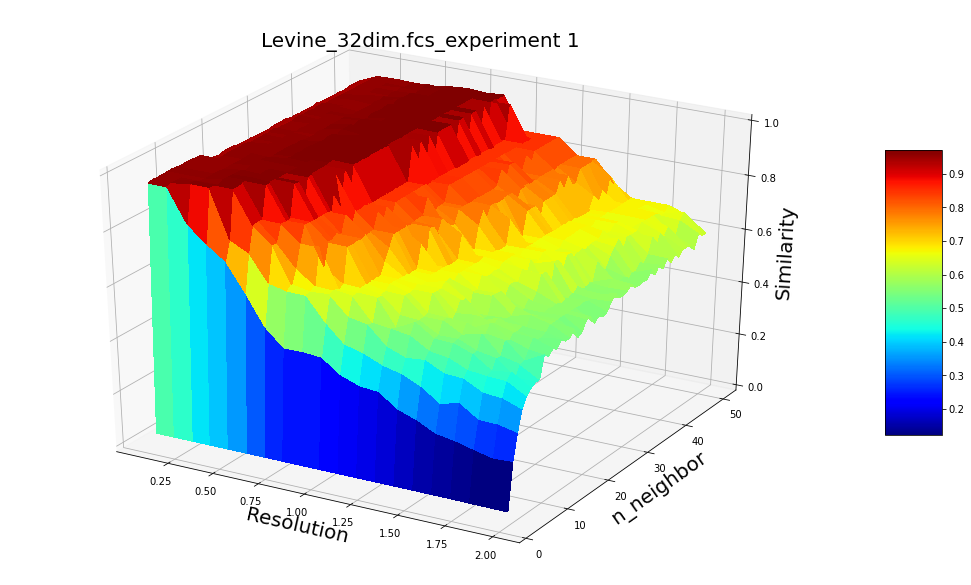

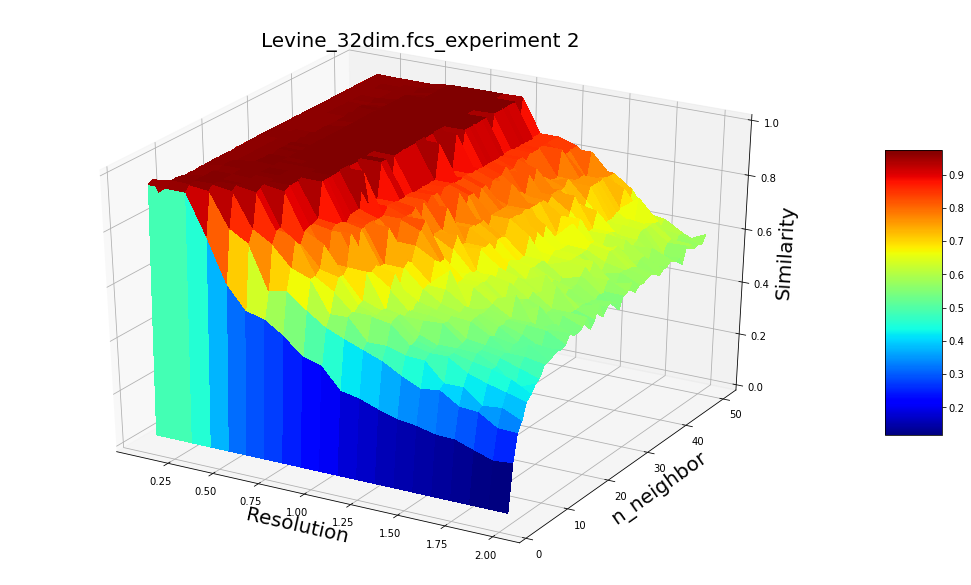

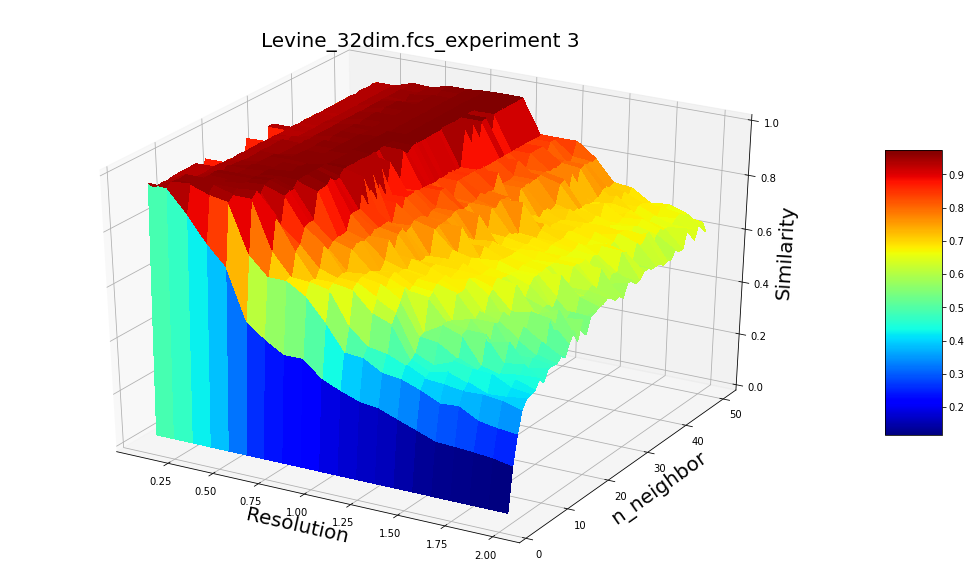

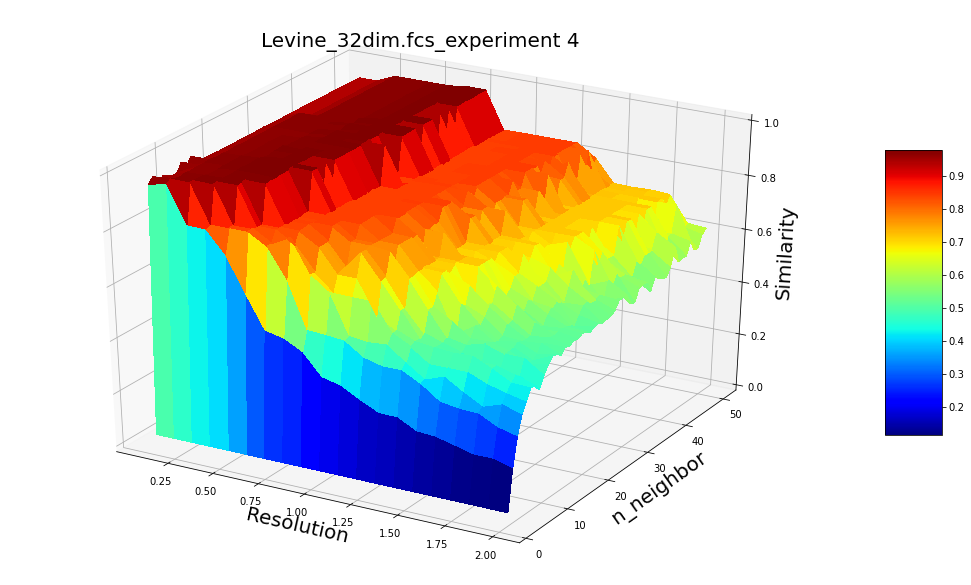

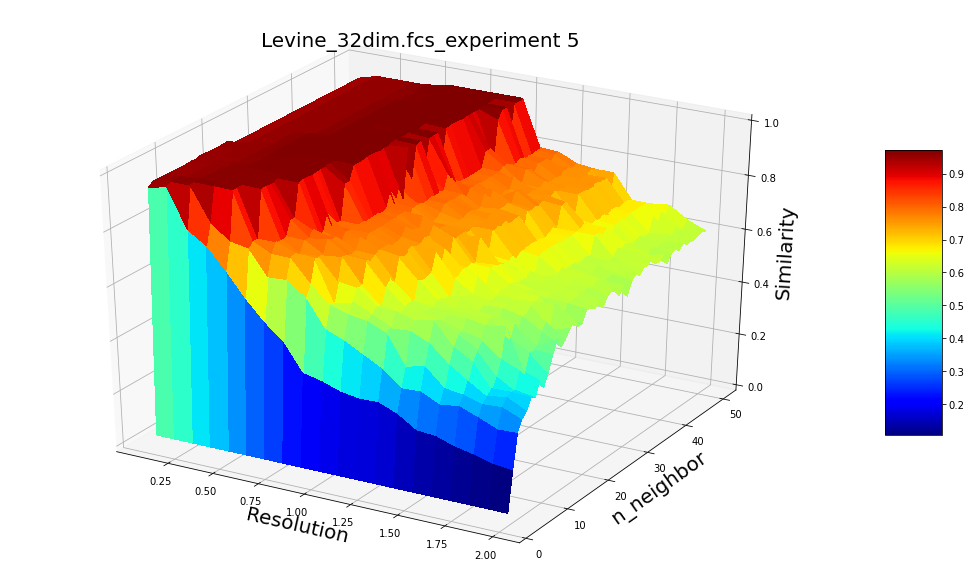

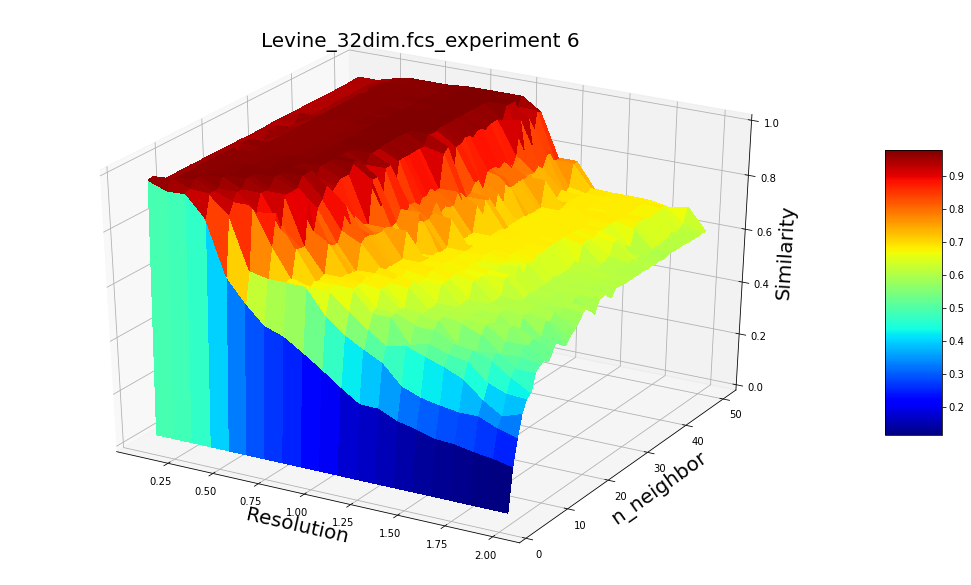

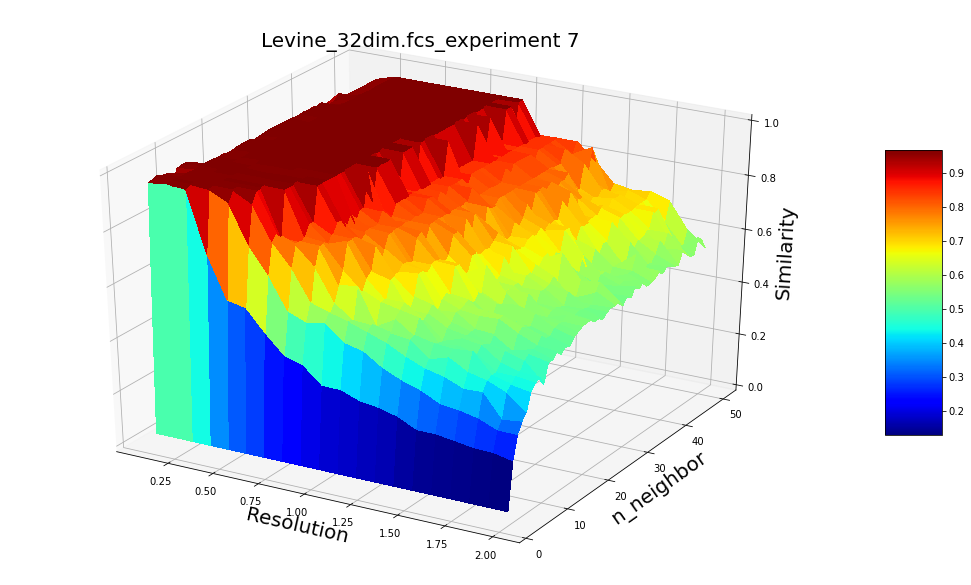

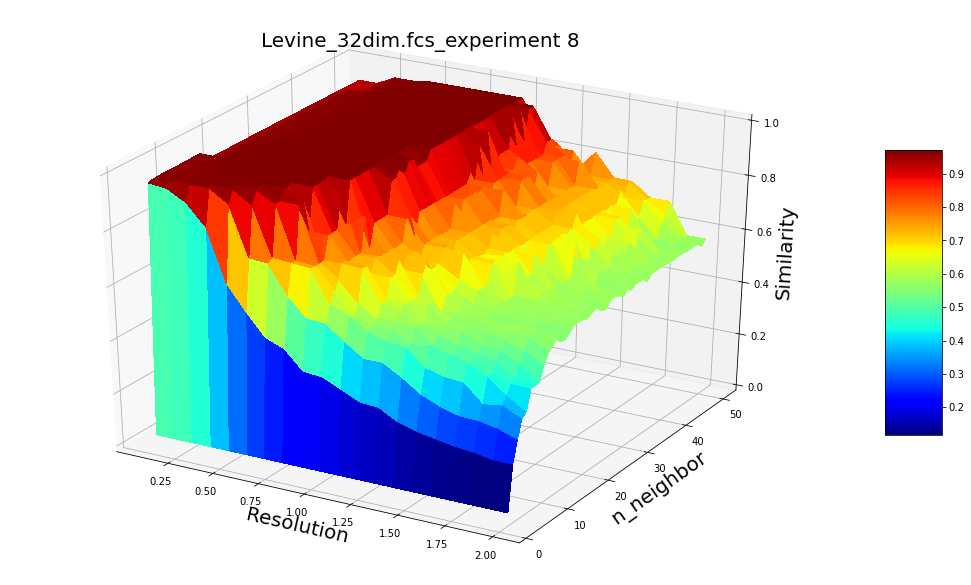

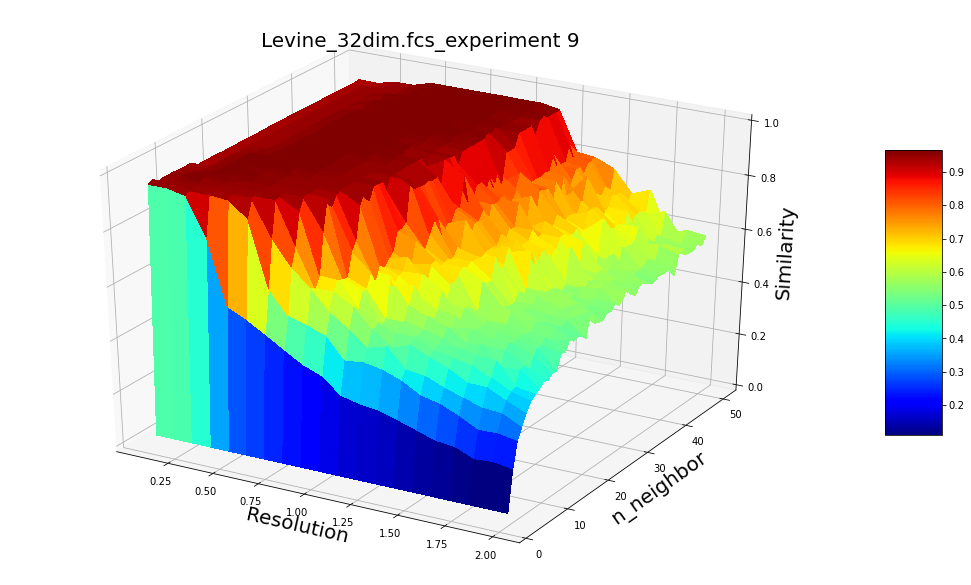

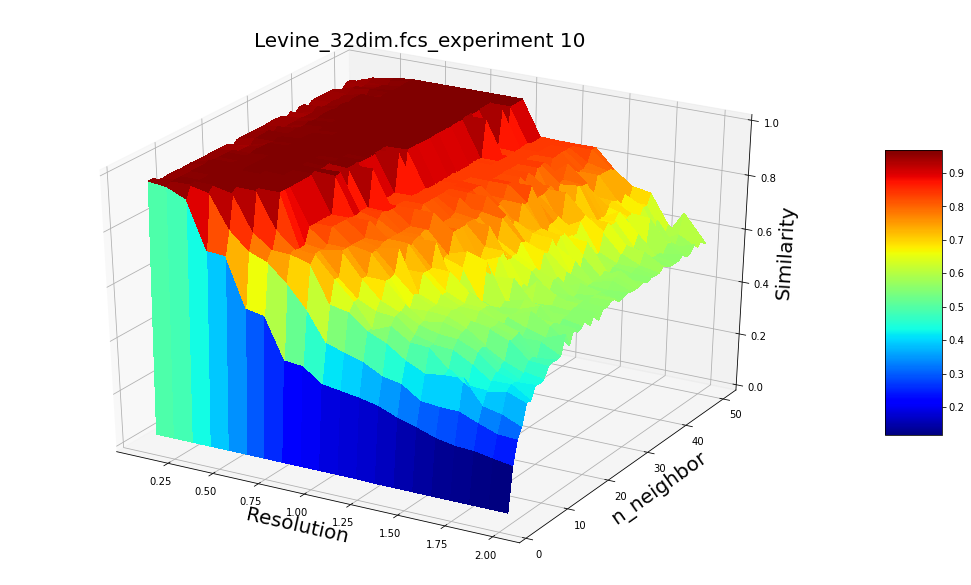

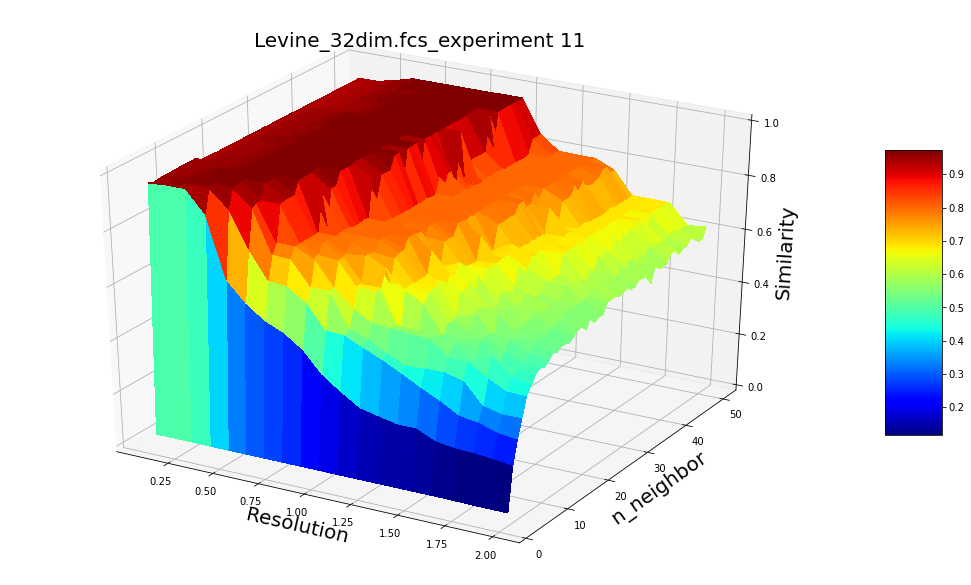

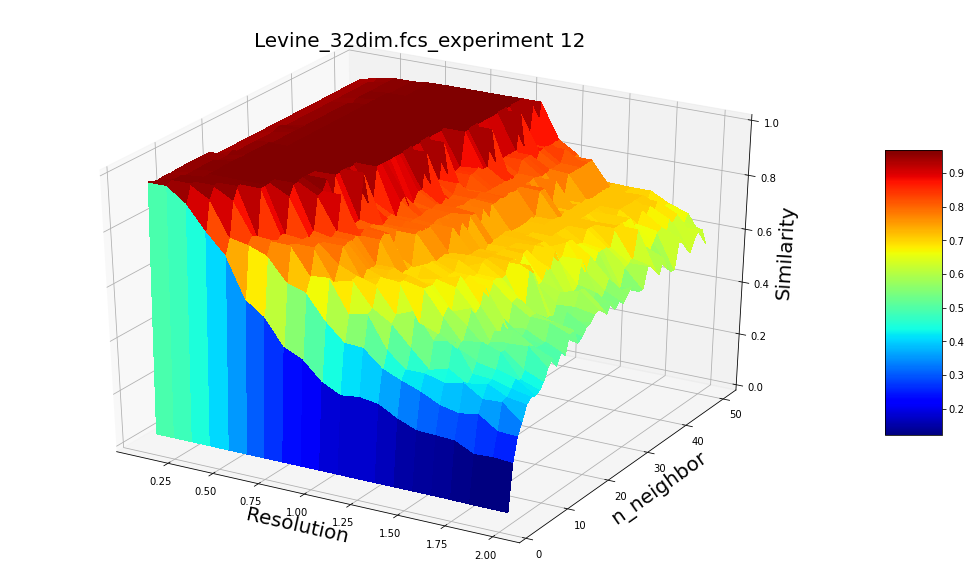

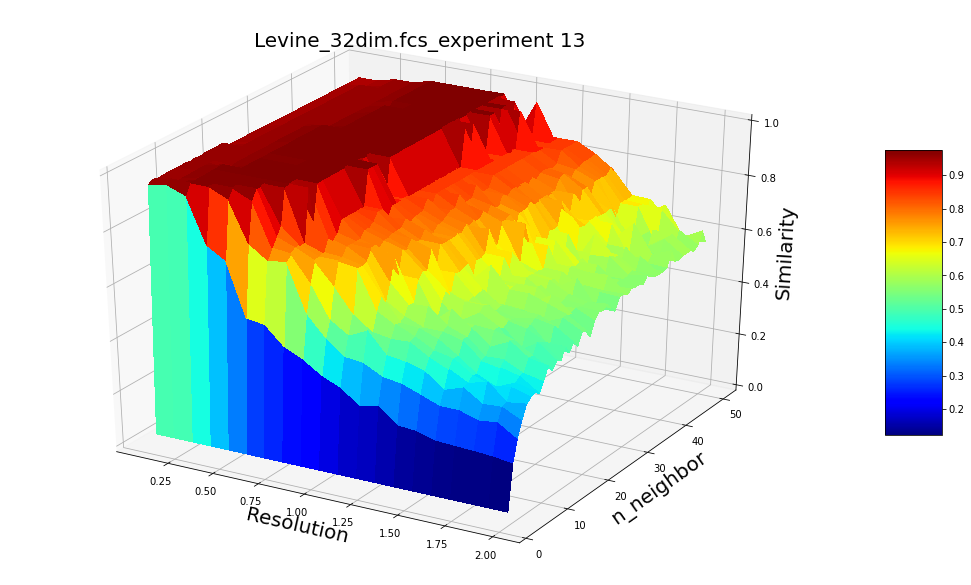

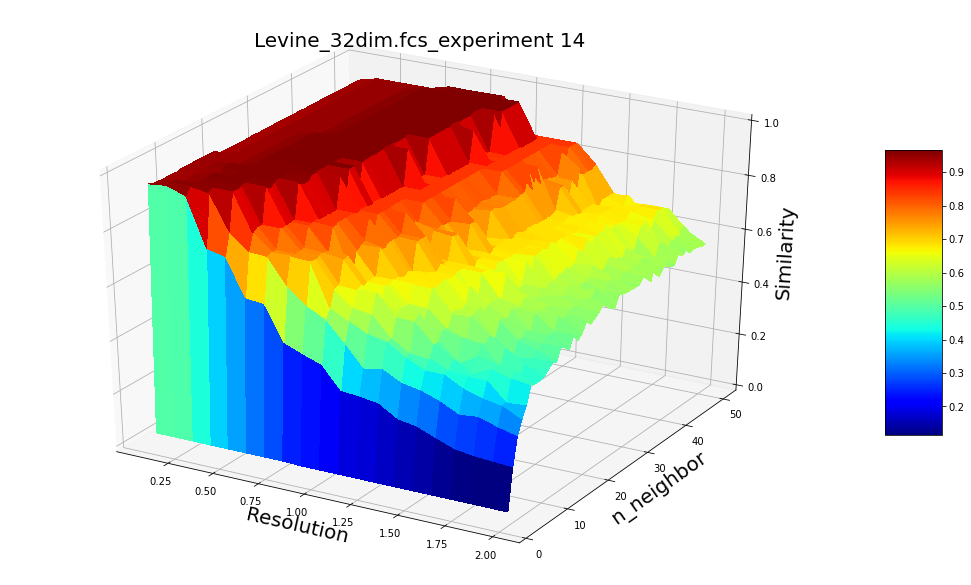

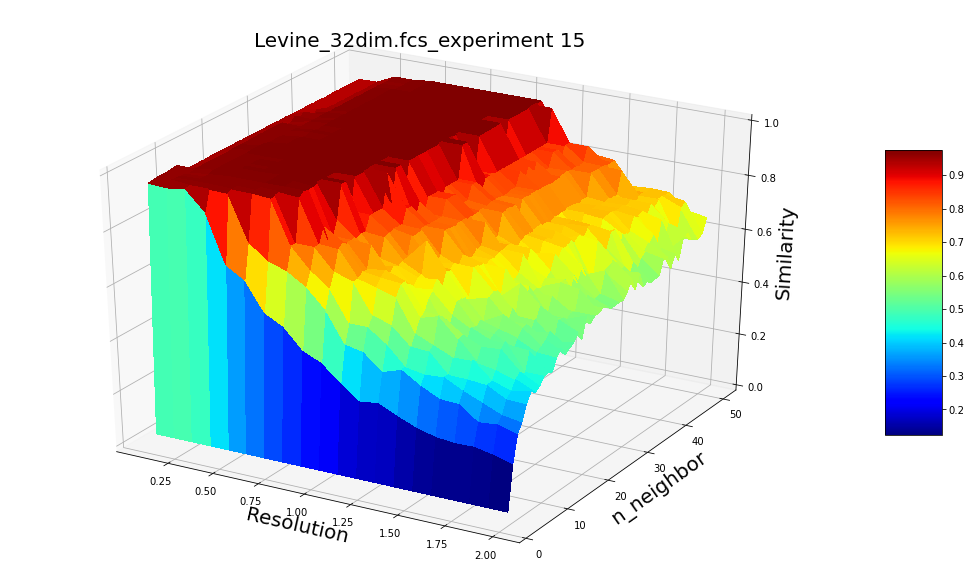

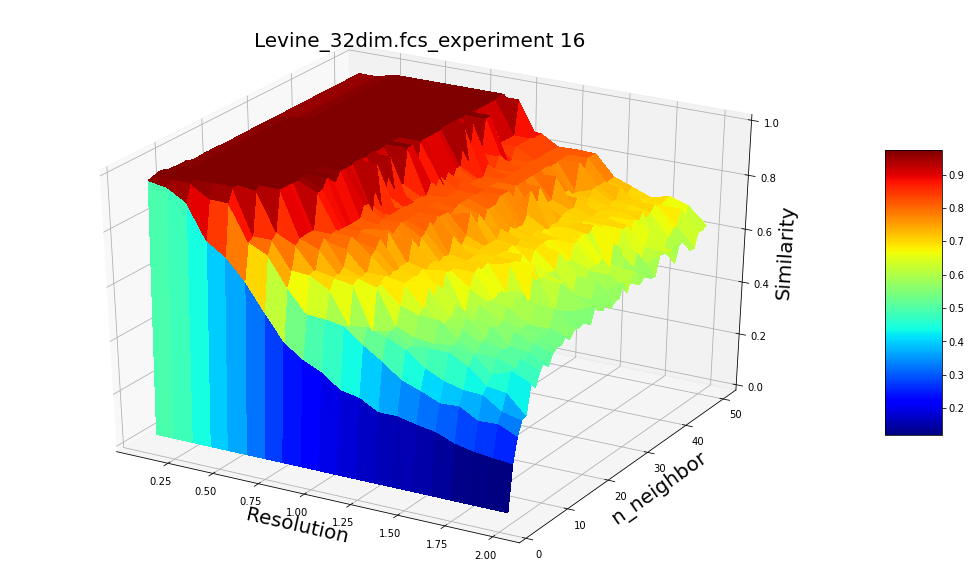

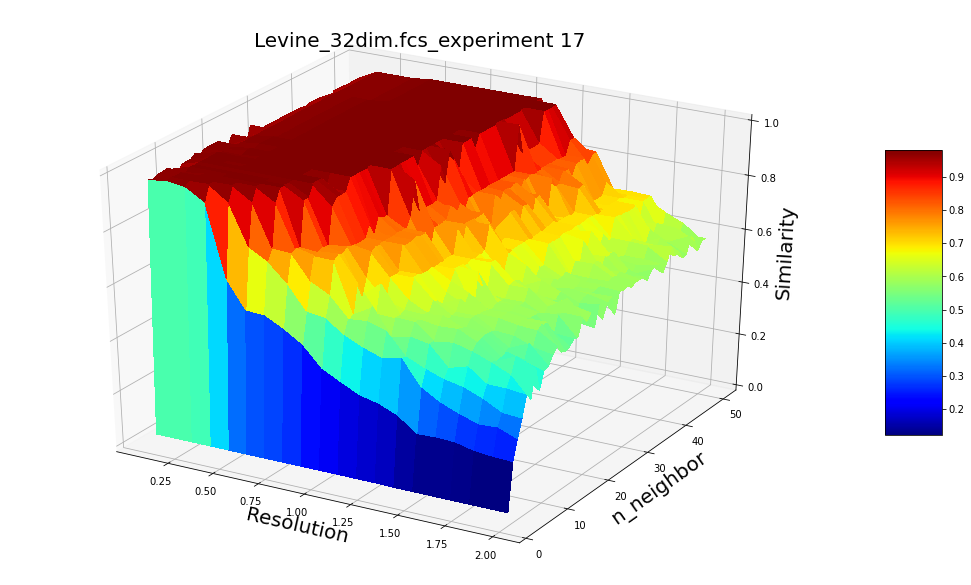

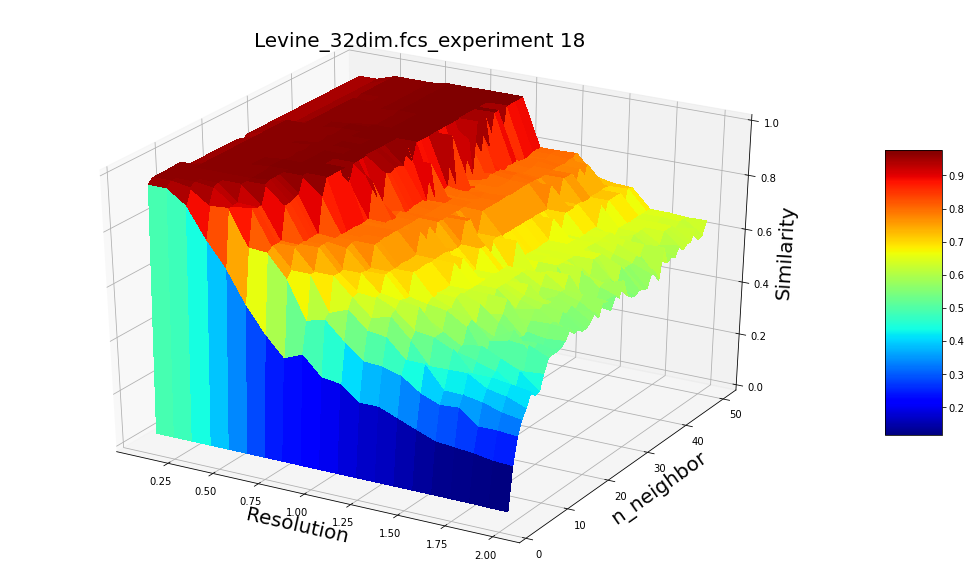

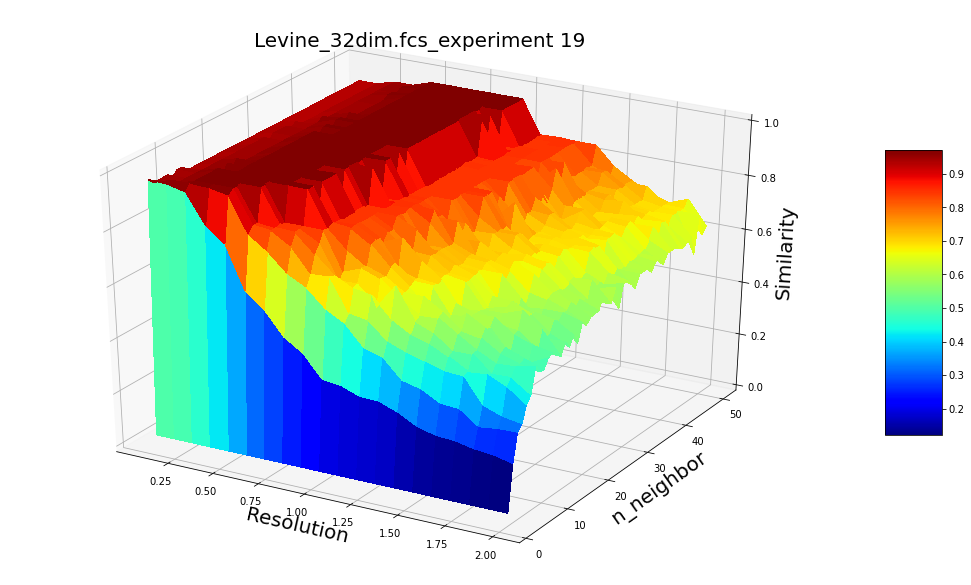

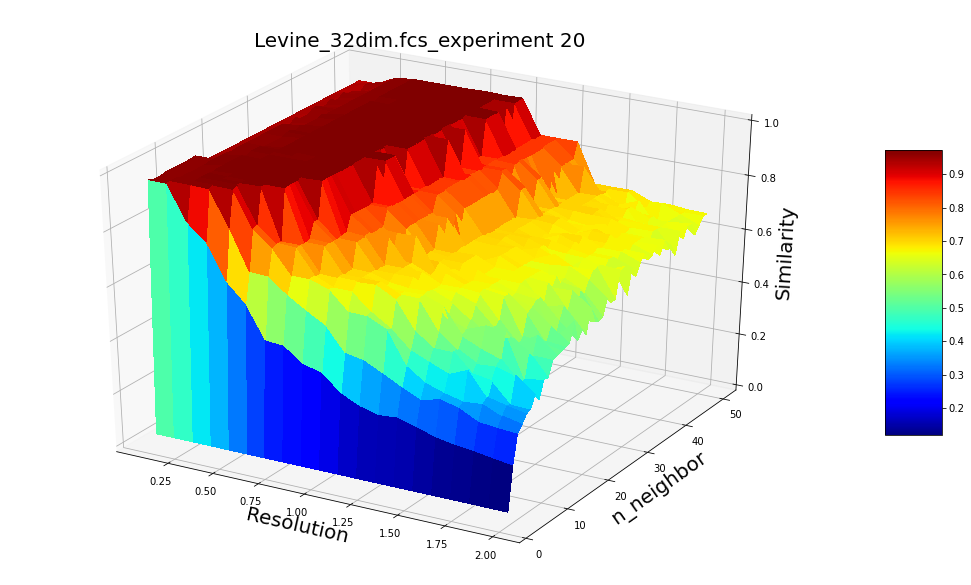

In [49]:
x = np.arange(0.1, 2.1, 0.1)
y = np.arange(2, 51, 1)
X, Y = np.meshgrid(x, y)

sourse_file = 'Levine_32dim.fcs'
for i in range(0, n_experiment):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.gca(projection = '3d')
    jet = plt.get_cmap('jet')

    Z = np.reshape(similarity_array_total_32[i], (49, 20))
    surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0, antialiased=False)
    
    ax.set_zlim3d(0, 1.0)
    ax.set_title(sourse_file + "_experiment " + str(i + 1), fontsize = 20)
    ax.set_xlabel("Resolution", fontsize = 20)
    ax.set_ylabel("n_neighbor", fontsize = 20)
    ax.set_zlabel("Similarity", fontsize = 20)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    

#### Save files for future use

In [56]:
np.savetxt('Samusik_01.fcs(1-20)(similarity).csv', similarity_array_total_01, delimiter = ',')
np.savetxt('Samusik_01.fcs(1-20)(n_neighbor).csv', n_neighbors_array_total_01, delimiter = ',')
np.savetxt('Samusik_01.fcs(1-20)(resolution).csv', resolution_array_total_01, delimiter = ',')

np.savetxt('Levine_13dim.fcs(1-20)(similarity).csv', similarity_array_total_13, delimiter = ',')
np.savetxt('Levine_13dim.fcs(1-20)(n_neighbor).csv', n_neighbors_array_total_13, delimiter = ',')
np.savetxt('Levine_13dim.fcs(1-20)(resolution).csv', resolution_array_total_13, delimiter = ',')

np.savetxt('Levine_32dim.fcs(1-20)(similarity).csv', similarity_array_total_32, delimiter = ',')
np.savetxt('Levine_32dim.fcs(1-20)(n_neighbor).csv', n_neighbors_array_total_32, delimiter = ',')
np.savetxt('Levine_32dim.fcs(1-20)(resolution).csv', resolution_array_total_32, delimiter = ',')